In [5]:
%pip install load_dotenv

Note: you may need to restart the kernel to use updated packages.


# Trying to visualize TWIBOT22 
#### Ik my dataset dir is exposed. good luck hacking.

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()
DATASET_DIR = os.getenv("DATASET_DIR")

DATASET_DIR

'G:\\CODING\\DATASETS\\TWIBOT22'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
## json format of user.json
{
    "created_at": "2020-01-16 02:02:55+00:00",
    "description": "Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw",
    "entities": {
        "url": {
            "urls": [
                {
                    "start": 0,
                    "end": 23,
                    "url": "https://t.co/BoMip9FF17",
                    "expanded_url": "https://www.boazbarak.org/",
                    "display_url": "boazbarak.org"
                }
            ]
        },
        "description": {
            "urls": [
                {
                    "start": 41,
                    "end": 64,
                    "url": "https://t.co/EXWR5jOrFW",
                    "expanded_url": "http://windowsontheory.org",
                    "display_url": "windowsontheory.org"
                },
                {
                    "start": 69,
                    "end": 92,
                    "url": "https://t.co/JEkxX4JHSw",
                    "expanded_url": "http://mltheory.org",
                    "display_url": "mltheory.org"
                }
            ]
        }
    },
    "id": "u1217628182611927040",
    "location": "Cambridge, MA",
    "name": "Boaz Barak",
    "pinned_tweet_id": null,
    "profile_image_url": "https://pbs.twimg.com/profile_images/1252262363132280834/ytIN-vzv_normal.jpg",
    "protected": false,
    "public_metrics": {
        "followers_count": 7316,
        "following_count": 215,
        "tweet_count": 3098,
        "listed_count": 69
    },
    "url": "https://t.co/BoMip9FF17",
    "username": "boazbaraktcs",
    "verified": false,
    "withheld": null
}

In [3]:
#dataset split
split_path = os.path.join(DATASET_DIR, "split.csv")
split = pd.read_csv(split_path)
#count the number of ids where split = train, tes  t, val
split['split'].value_counts()


split
train    700000
val      200000
test     100000
Name: count, dtype: int64

In [10]:
# Load user data
import json

user_path = os.path.join(DATASET_DIR, "user.json")

# Check the file format first
with open(user_path, 'r', encoding='utf-8') as f:
    first_line = f.readline()
    print("First line preview:", first_line[:200])

# Load the entire JSON file
with open(user_path, 'r', encoding='utf-8') as f:
    data = json.load(f)
    
# Check if it's a dictionary or list
if isinstance(data, dict):
    # If it's a dictionary with user IDs as keys, convert to list
    users = list(data.values())
    print(f"Loaded dictionary with {len(users)} users")
else:
    # If it's already a list
    users = data
    print(f"Loaded list with {len(users)} users")

# Convert to DataFrame
users_df = pd.DataFrame(users)
print(f"DataFrame shape: {users_df.shape}")
users_df.head()

First line preview: [{"created_at": "2020-01-16 02:02:55+00:00", "description": "Theoretical Computer Scientist. See also https://t.co/EXWR5jOrFW and https://t.co/JEkxX4JHSw", "entities": {"url": {"urls": [{"start": 0, "
Loaded list with 1000000 users
Loaded list with 1000000 users
DataFrame shape: (1000000, 14)
DataFrame shape: (1000000, 14)


,created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,url,username,verified,withheld
0,2020-01-16 02:02:55+00:00,Theoretical Computer Scientist. See also https...,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",u1217628182611927040,"Cambridge, MA",Boaz Barak,NaN,https://pbs.twimg.com/profile_images/125226236...,False,"{'followers_count': 7316, 'following_count': 2...",https://t.co/BoMip9FF17,boazbaraktcs,False,None
1,2014-07-02 17:56:46+00:00,creative _,None,u2664730894,🎈,olawale 💨,NaN,https://pbs.twimg.com/profile_images/147837638...,False,"{'followers_count': 123, 'following_count': 10...",,wale_io,False,None
2,2020-05-30 12:10:45+00:00,👽,None,u1266703520205549568,None,panagiota_.b,NaN,https://pbs.twimg.com/profile_images/142608606...,False,"{'followers_count': 3, 'following_count': 62, ...",,b_panagiota,False,None
3,2019-01-26 13:52:49+00:00,mama to maya. ABIM research pathway fellow @UV...,"{'description': {'mentions': [{'start': 43, 'e...",u1089159225148882949,"Charlottesville, VA","Jacqueline Hodges, MD MPH",NaN,https://pbs.twimg.com/profile_images/130229171...,False,"{'followers_count': 350, 'following_count': 57...",,jachodges_md,False,None
4,2009-04-30 19:01:42+00:00,Father / SWT Alumnus / Longhorn Fan,None,u36741729,United States,Matthew Stubblefield,NaN,https://pbs.twimg.com/profile_images/145808462...,True,"{'followers_count': 240, 'following_count': 29...",,Matthew_Brody,False,None


In [13]:
# Check what columns are in split
print("Split columns:", split.columns.tolist())
print("\nSplit head:")
split.head()

Split columns: ['id', 'split']

Split head:


,id,split
0,u2664730894,train
1,u1089159225148882949,train
2,u36741729,train
3,u1679822588,train
4,u1519144464,train


In [15]:
# Check what files are in the dataset directory
import os
dataset_files = os.listdir(DATASET_DIR)
print("Dataset files:")
for f in sorted(dataset_files):
    print(f"  - {f}")

Dataset files:
  - edge-001.csv
  - hashtag.json
  - label.csv
  - list.json
  - readme.md
  - split.csv
  - tweet_0-008.json
  - tweet_1-005.json
  - tweet_2-009.json
  - tweet_3-010.json
  - tweet_4-011.json
  - tweet_5-002.json
  - tweet_6-006.json
  - tweet_7-004.json
  - tweet_8-003.json
  - user.json


In [20]:
# Reload users_df fresh to avoid duplicate column issues
users_df = pd.DataFrame(users)

# Extract public metrics into separate columns
users_df['followers_count'] = users_df['public_metrics'].apply(lambda x: x.get('followers_count', 0) if isinstance(x, dict) else 0)
users_df['following_count'] = users_df['public_metrics'].apply(lambda x: x.get('following_count', 0) if isinstance(x, dict) else 0)
users_df['tweet_count'] = users_df['public_metrics'].apply(lambda x: x.get('tweet_count', 0) if isinstance(x, dict) else 0)
users_df['listed_count'] = users_df['public_metrics'].apply(lambda x: x.get('listed_count', 0) if isinstance(x, dict) else 0)

# Load label data
label_path = os.path.join(DATASET_DIR, "label.csv")
labels = pd.read_csv(label_path)
print(f"Loaded {len(labels)} labels")
print("Label value counts:")
print(labels['label'].value_counts())

# Convert label to numeric (0=human, 1=bot)
labels['label'] = labels['label'].map({'human': 0, 'bot': 1})

# Merge split and labels first
split_labels = split.merge(labels, left_on='id', right_on='id', how='inner')
print(f"\nSplit+Labels: {len(split_labels)} entries")

# Then merge with users
users_df = users_df.merge(split_labels, left_on='id', right_on='id', how='inner')

print(f"\nUsers with split and labels: {len(users_df)}")
print("\nAvailable columns:", users_df.columns.tolist())

# Show sample with available columns
display_cols = ['id', 'followers_count', 'following_count', 'verified', 'split', 'label']
# Add username if it exists
if 'username' in users_df.columns:
    display_cols.insert(1, 'username')
    
users_df[display_cols].head(10)

Loaded 1000000 labels
Label value counts:
label
human    860057
bot      139943
Name: count, dtype: int64

Split+Labels: 1000000 entries

Split+Labels: 1000000 entries

Users with split and labels: 1000000

Available columns: ['created_at', 'description', 'entities', 'id', 'location', 'name', 'pinned_tweet_id', 'profile_image_url', 'protected', 'public_metrics', 'url', 'username', 'verified', 'withheld', 'followers_count', 'following_count', 'tweet_count', 'listed_count', 'split', 'label']

Users with split and labels: 1000000

Available columns: ['created_at', 'description', 'entities', 'id', 'location', 'name', 'pinned_tweet_id', 'profile_image_url', 'protected', 'public_metrics', 'url', 'username', 'verified', 'withheld', 'followers_count', 'following_count', 'tweet_count', 'listed_count', 'split', 'label']


,id,username,followers_count,following_count,verified,split,label
0,u1217628182611927040,boazbaraktcs,7316,215,False,test,0
1,u2664730894,wale_io,123,1090,False,train,0
2,u1266703520205549568,b_panagiota,3,62,False,test,0
3,u1089159225148882949,jachodges_md,350,577,False,train,0
4,u36741729,Matthew_Brody,240,297,False,train,1
5,u1365527332627247104,vsathishkumar09,1,378,False,test,1
6,u1679822588,GrianMC,238254,293,False,train,1
7,u1519144464,NikhilSewdass,161,278,False,train,0
8,u15211869,jamie_love,10299,2166,True,train,0
9,u1309034737756000256,CokeGoves,217,233,False,train,0


In [21]:
# Basic statistics
print("Dataset Statistics:")
print(f"Total users: {len(users_df)}")
print(f"\nLabel distribution:")
print(users_df['label'].value_counts())
print(f"\nSplit distribution:")
print(users_df['split'].value_counts())
print(f"\nVerified users: {users_df['verified'].sum()}")
print(f"\nBasic metrics:")
print(users_df[['followers_count', 'following_count', 'tweet_count']].describe())

Dataset Statistics:
Total users: 1000000

Label distribution:
label
0    860057
1    139943
Name: count, dtype: int64

Split distribution:
split
train    700000
val      200000
test     100000
Name: count, dtype: int64

Verified users: 95398

Basic metrics:
       followers_count  following_count   tweet_count
count     1.000000e+06     1.000000e+06  1.000000e+06
mean      4.123015e+04     2.250534e+03  2.168910e+04
std       6.020776e+05     1.578238e+04  1.202469e+05
min       0.000000e+00     0.000000e+00  0.000000e+00
25%       1.550000e+02     2.060000e+02  3.650000e+02
50%       9.280000e+02     6.420000e+02  3.126000e+03
75%       5.038000e+03     1.706000e+03  1.540125e+04
max       1.306131e+08     4.161031e+06  8.020813e+07


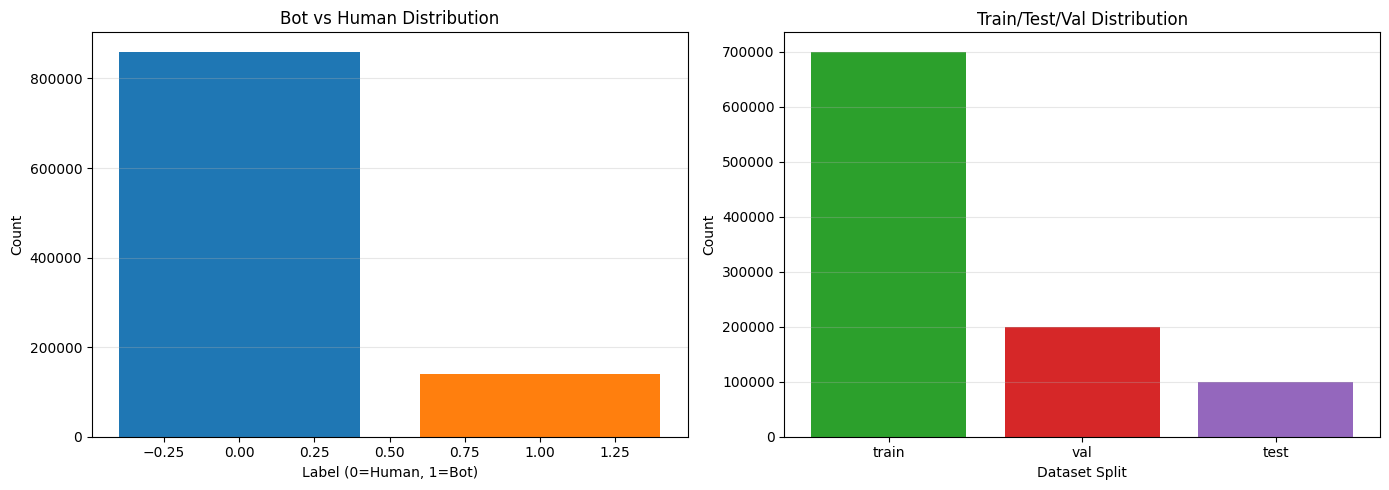

In [22]:
# Visualization 1: Label distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Label distribution
label_counts = users_df['label'].value_counts()
axes[0].bar(label_counts.index, label_counts.values, color=['#1f77b4', '#ff7f0e'])
axes[0].set_xlabel('Label (0=Human, 1=Bot)')
axes[0].set_ylabel('Count')
axes[0].set_title('Bot vs Human Distribution')
axes[0].grid(axis='y', alpha=0.3)

# Split distribution
split_counts = users_df['split'].value_counts()
axes[1].bar(split_counts.index, split_counts.values, color=['#2ca02c', '#d62728', '#9467bd'])
axes[1].set_xlabel('Dataset Split')
axes[1].set_ylabel('Count')
axes[1].set_title('Train/Test/Val Distribution')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

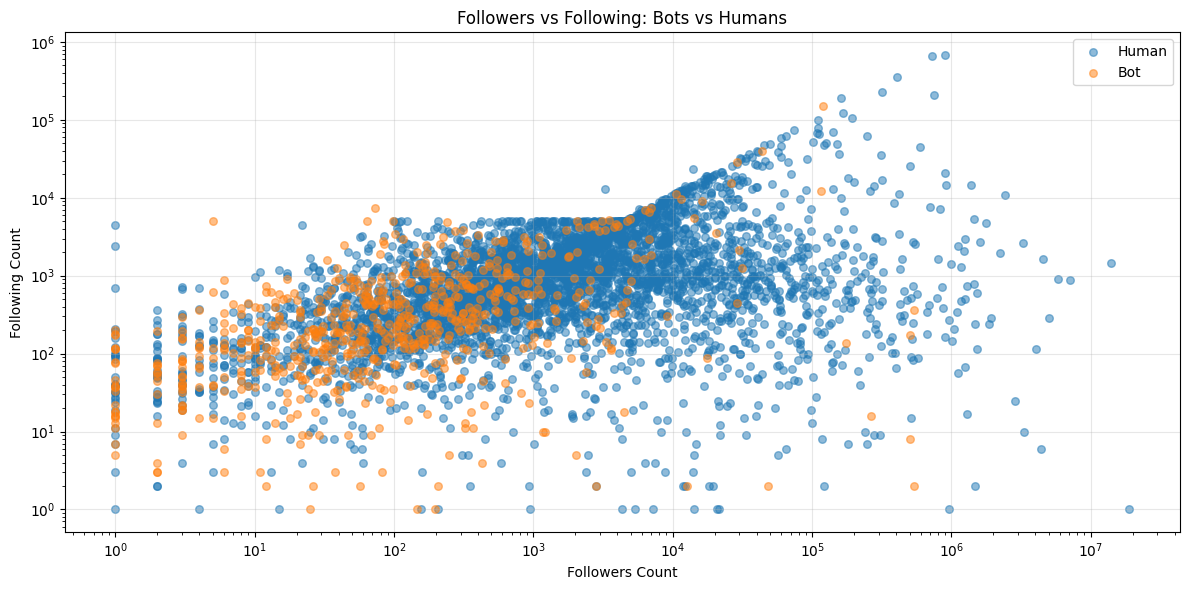

In [23]:
# Visualization 2: Followers vs Following (Bot vs Human)
plt.figure(figsize=(12, 6))

# Sample data if too large
sample_size = min(5000, len(users_df))
sample_df = users_df.sample(n=sample_size, random_state=42)

# Create scatter plot
colors = {0: '#1f77b4', 1: '#ff7f0e'}
for label in [0, 1]:
    data = sample_df[sample_df['label'] == label]
    plt.scatter(data['followers_count'], data['following_count'], 
                alpha=0.5, s=30, c=colors[label], 
                label='Human' if label == 0 else 'Bot')

plt.xlabel('Followers Count')
plt.ylabel('Following Count')
plt.title('Followers vs Following: Bots vs Humans')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_30008\1985533111.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Human', 'Bot'], patch_artist=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_30008\1985533111.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Human', 'Bot'], patch_artist=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_30008\1985533111.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Human', 'Bot'], patch_artist=True)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_30008\198

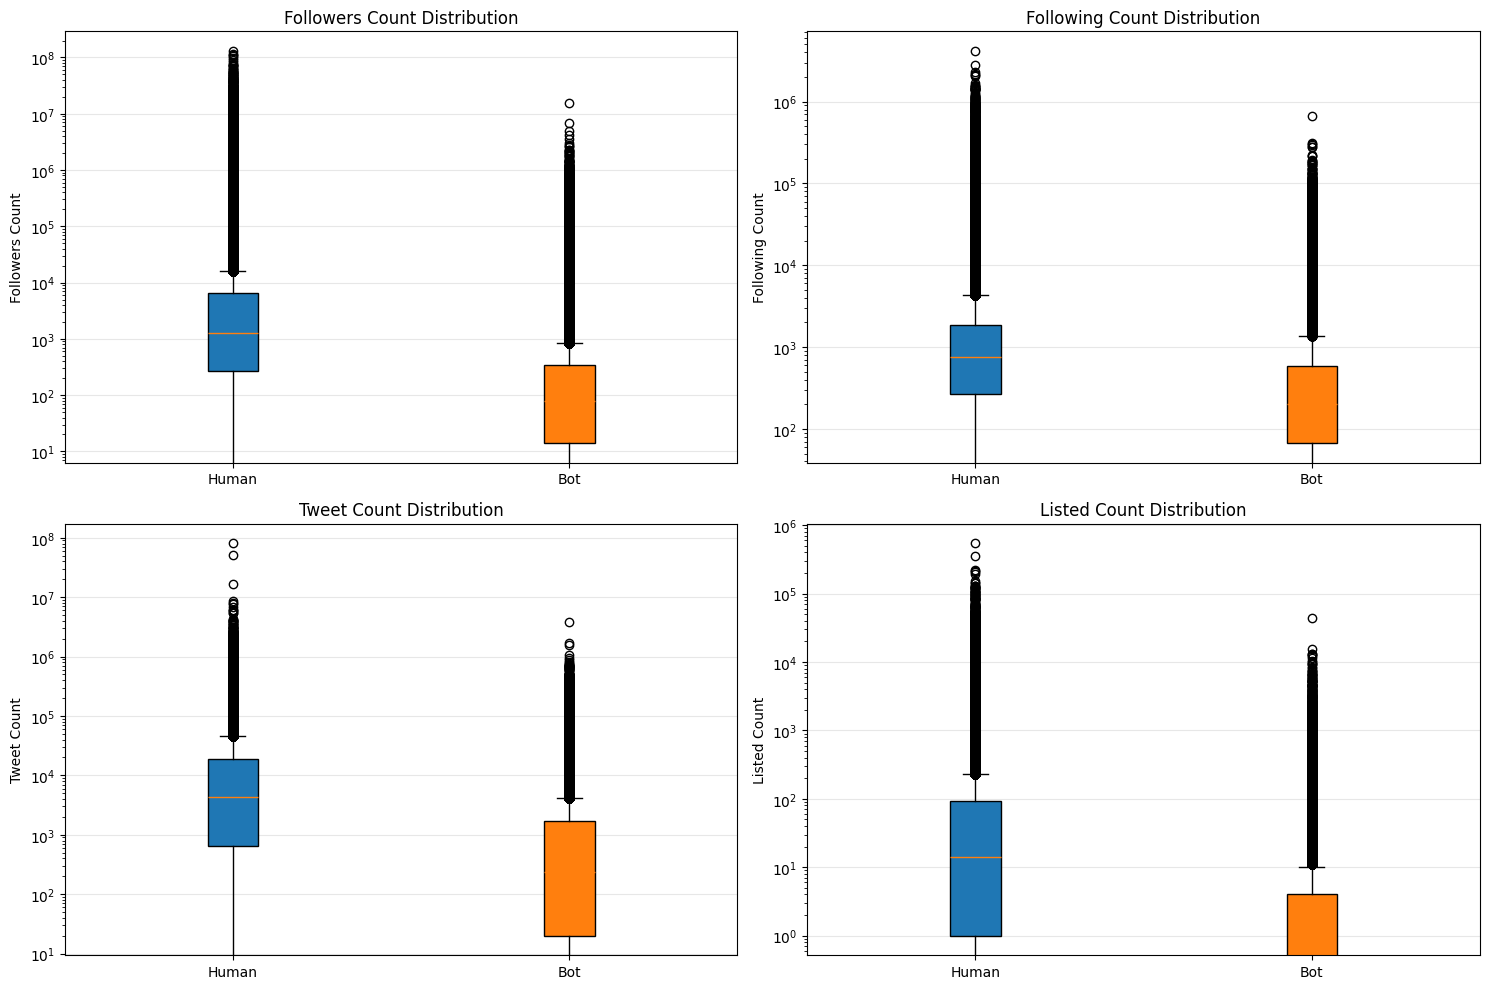

In [24]:
# Visualization 3: Distribution of metrics by label
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['followers_count', 'following_count', 'tweet_count', 'listed_count']
titles = ['Followers Count', 'Following Count', 'Tweet Count', 'Listed Count']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]
    
    # Box plot for each label
    data_to_plot = [
        users_df[users_df['label'] == 0][metric],
        users_df[users_df['label'] == 1][metric]
    ]
    
    bp = ax.boxplot(data_to_plot, labels=['Human', 'Bot'], patch_artist=True)
    bp['boxes'][0].set_facecolor('#1f77b4')
    bp['boxes'][1].set_facecolor('#ff7f0e')
    
    ax.set_ylabel(title)
    ax.set_title(f'{title} Distribution')
    ax.set_yscale('log')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

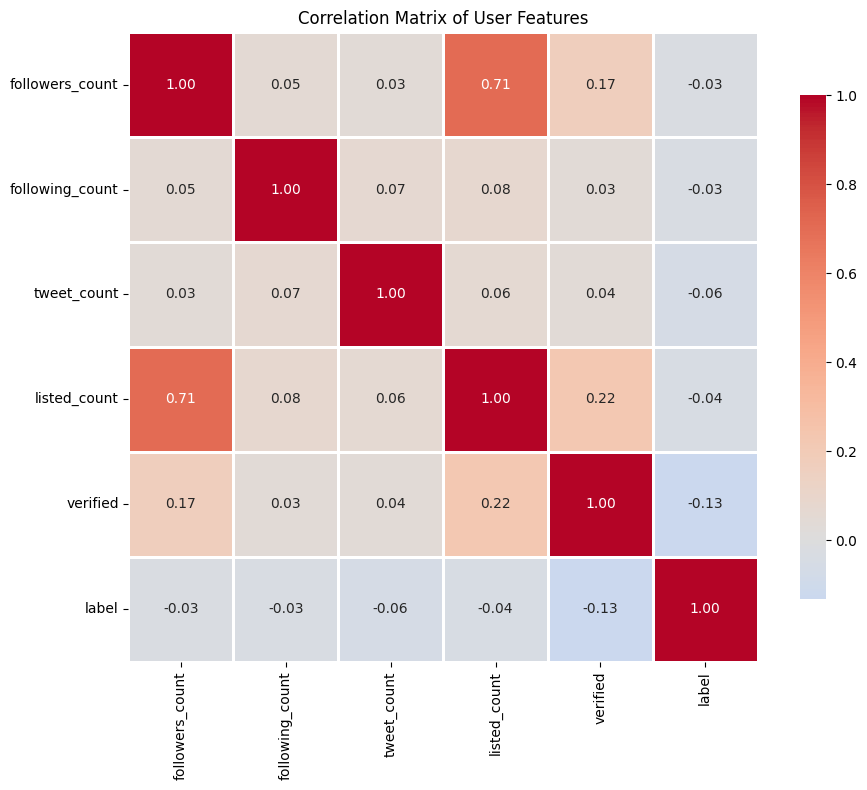

In [25]:
# Visualization 4: Correlation heatmap
plt.figure(figsize=(10, 8))

# Select numeric columns for correlation
numeric_cols = ['followers_count', 'following_count', 'tweet_count', 'listed_count', 'verified', 'label']
correlation_matrix = users_df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of User Features')
plt.tight_layout()
plt.show()

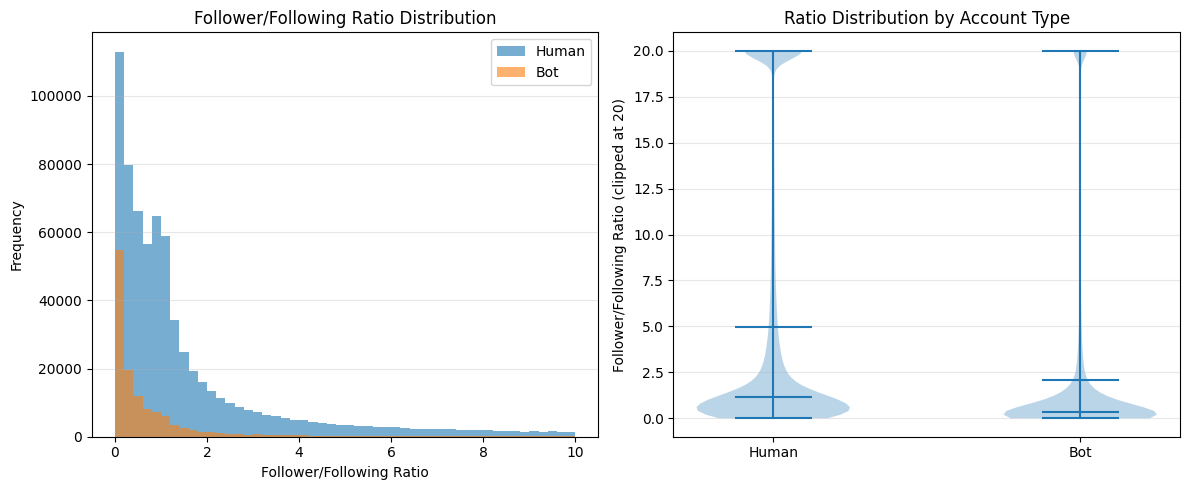

In [26]:
# Visualization 5: Follower/Following Ratio Analysis
users_df['follower_following_ratio'] = users_df['followers_count'] / (users_df['following_count'] + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Histogram comparison
plt.hist(users_df[users_df['label'] == 0]['follower_following_ratio'], 
         bins=50, alpha=0.6, label='Human', color='#1f77b4', range=(0, 10))
plt.hist(users_df[users_df['label'] == 1]['follower_following_ratio'], 
         bins=50, alpha=0.6, label='Bot', color='#ff7f0e', range=(0, 10))
plt.xlabel('Follower/Following Ratio')
plt.ylabel('Frequency')
plt.title('Follower/Following Ratio Distribution')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
# Violin plot
data_to_plot = [
    users_df[users_df['label'] == 0]['follower_following_ratio'].clip(0, 20),
    users_df[users_df['label'] == 1]['follower_following_ratio'].clip(0, 20)
]
parts = plt.violinplot(data_to_plot, positions=[0, 1], showmeans=True, showmedians=True)
plt.xticks([0, 1], ['Human', 'Bot'])
plt.ylabel('Follower/Following Ratio (clipped at 20)')
plt.title('Ratio Distribution by Account Type')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Tweet Data Analysis

In [27]:
# Load one tweet file
tweet_path = os.path.join(DATASET_DIR, "tweet_0-008.json")

with open(tweet_path, 'r', encoding='utf-8') as f:
    tweet_data = json.load(f)

# Check structure
if isinstance(tweet_data, dict):
    print(f"Tweet data is a dictionary with {len(tweet_data)} entries")
    tweets = list(tweet_data.values())
elif isinstance(tweet_data, list):
    print(f"Tweet data is a list with {len(tweet_data)} entries")
    tweets = tweet_data
else:
    print(f"Unexpected format: {type(tweet_data)}")
    tweets = []

print(f"\nTotal tweets loaded: {len(tweets)}")

# Show first tweet structure
if tweets:
    print("\nFirst tweet structure:")
    print(json.dumps(tweets[0], indent=2)[:1000])  # First 1000 chars

Tweet data is a list with 10000000 entries

Total tweets loaded: 10000000

First tweet structure:
{
  "attachments": null,
  "author_id": 1304855289208819713,
  "context_annotations": null,
  "conversation_id": 1497798545872588801,
  "created_at": "2022-02-27 04:59:35+00:00",
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [
      {
        "screen_name": "phaseknight_",
        "name": "sapphire starlight \ud83d\udc99\u2728",
        "id": 976935699793539073,
        "id_str": "976935699793539073",
        "indices": [
          0,
          13
        ]
      }
    ],
    "urls": [],
    "media": [
      {
        "id": 1497798542869422086,
        "id_str": "1497798542869422086",
        "indices": [
          135,
          158
        ],
        "media_url": "http://pbs.twimg.com/media/FMk_1szUYAYeJ7N.jpg",
        "media_url_https": "https://pbs.twimg.com/media/FMk_1szUYAYeJ7N.jpg",
        "url": "https://t.co/GXjjq83Rrn",
        "display_url": "pic.

In [29]:
print(json.dumps(tweets[0], indent=2))

{
  "attachments": null,
  "author_id": 1304855289208819713,
  "context_annotations": null,
  "conversation_id": 1497798545872588801,
  "created_at": "2022-02-27 04:59:35+00:00",
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [
      {
        "screen_name": "phaseknight_",
        "name": "sapphire starlight \ud83d\udc99\u2728",
        "id": 976935699793539073,
        "id_str": "976935699793539073",
        "indices": [
          0,
          13
        ]
      }
    ],
    "urls": [],
    "media": [
      {
        "id": 1497798542869422086,
        "id_str": "1497798542869422086",
        "indices": [
          135,
          158
        ],
        "media_url": "http://pbs.twimg.com/media/FMk_1szUYAYeJ7N.jpg",
        "media_url_https": "https://pbs.twimg.com/media/FMk_1szUYAYeJ7N.jpg",
        "url": "https://t.co/GXjjq83Rrn",
        "display_url": "pic.twitter.com/GXjjq83Rrn",
        "expanded_url": "https://twitter.com/cbtillustrates/status/149779

In [30]:
# Convert tweets to DataFrame
tweets_df = pd.DataFrame(tweets)
print(f"Tweets DataFrame shape: {tweets_df.shape}")
print(f"\nColumns: {tweets_df.columns.tolist()}")
print(f"\nFirst few tweets:")
tweets_df.head()

Tweets DataFrame shape: (10000000, 17)

Columns: ['attachments', 'author_id', 'context_annotations', 'conversation_id', 'created_at', 'entities', 'geo', 'id', 'in_reply_to_user_id', 'lang', 'possibly_sensitive', 'public_metrics', 'referenced_tweets', 'reply_settings', 'source', 'text', 'withheld']

First few tweets:


,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,id,in_reply_to_user_id,lang,possibly_sensitive,public_metrics,referenced_tweets,reply_settings,source,text,withheld
0,None,1304855289208819713,None,1497798545872588801,2022-02-27 04:59:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,t1497798545872588801,9.769357e+17,en,False,"{'retweet_count': 0, 'reply_count': None, 'lik...",None,None,"<a href=""http://twitter.com/download/android"" ...",@phaseknight_ Although I didn't base this sket...,None
1,None,1304855289208819713,None,1496915534717210656,2022-02-24 18:30:49+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,t1496915534717210656,NaN,en,False,"{'retweet_count': 0, 'reply_count': None, 'lik...",None,None,"<a href=""http://twitter.com/download/android"" ...","I mean, doesn't his beautiful face just scream...",None
2,None,1304855289208819713,None,1495492095205068802,2022-02-20 20:14:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,t1495492095205068802,1.484074e+18,en,False,"{'retweet_count': 0, 'reply_count': None, 'lik...",None,None,"<a href=""http://twitter.com/download/android"" ...","@Cobalt_han I'm British, so that used to be me...",None
3,None,1304855289208819713,None,1495110995861114883,2022-02-19 19:00:13+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,t1495110995861114883,NaN,en,False,"{'retweet_count': 101, 'reply_count': None, 'l...",None,None,"<a href=""http://twitter.com/download/android"" ...",RT @itsginnydi: the only thing better than the...,None
4,None,1304855289208819713,None,1495110620277919745,2022-02-19 18:58:44+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",None,t1495110620277919745,1.304855e+18,en,False,"{'retweet_count': 0, 'reply_count': None, 'lik...",None,None,"<a href=""http://twitter.com/download/android"" ...","Lucky and his sister, among other bears, were ...",None


In [31]:
# Analyze tweet metrics
if 'public_metrics' in tweets_df.columns:
    tweets_df['retweet_count'] = tweets_df['public_metrics'].apply(lambda x: x.get('retweet_count', 0) if isinstance(x, dict) else 0)
    tweets_df['reply_count'] = tweets_df['public_metrics'].apply(lambda x: x.get('reply_count', 0) if isinstance(x, dict) else 0)
    tweets_df['like_count'] = tweets_df['public_metrics'].apply(lambda x: x.get('like_count', 0) if isinstance(x, dict) else 0)
    tweets_df['quote_count'] = tweets_df['public_metrics'].apply(lambda x: x.get('quote_count', 0) if isinstance(x, dict) else 0)

# Extract text length
if 'text' in tweets_df.columns:
    tweets_df['text_length'] = tweets_df['text'].apply(lambda x: len(str(x)) if x else 0)

print("Tweet Statistics:")
print(f"Total tweets: {len(tweets_df)}")

if 'author_id' in tweets_df.columns:
    print(f"Unique authors: {tweets_df['author_id'].nunique()}")
    
if 'text_length' in tweets_df.columns:
    print(f"\nText length stats:")
    print(tweets_df['text_length'].describe())

if 'retweet_count' in tweets_df.columns:
    print(f"\nEngagement stats:")
    print(tweets_df[['retweet_count', 'reply_count', 'like_count', 'quote_count']].describe())

Tweet Statistics:
Total tweets: 10000000
Unique authors: 314813

Text length stats:
Unique authors: 314813

Text length stats:
count    1.000000e+07
mean     1.325886e+02
std      7.575197e+01
min      1.000000e+00
25%      7.400000e+01
50%      1.390000e+02
75%      1.500000e+02
max      1.054000e+03
Name: text_length, dtype: float64

Engagement stats:
count    1.000000e+07
mean     1.325886e+02
std      7.575197e+01
min      1.000000e+00
25%      7.400000e+01
50%      1.390000e+02
75%      1.500000e+02
max      1.054000e+03
Name: text_length, dtype: float64

Engagement stats:
       retweet_count    reply_count    like_count    quote_count
count   1.000000e+07  824773.000000  1.000000e+07  824773.000000
mean    5.761473e+02       6.153167  1.210479e+02       2.662641
std     9.988002e+03     190.678318  3.869986e+03     199.465945
min     0.000000e+00       0.000000  0.000000e+00       0.000000
25%     0.000000e+00       0.000000  0.000000e+00       0.000000
50%     1.000000e+00     

In [34]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   attachments          object 
 1   author_id            int64  
 2   context_annotations  object 
 3   conversation_id      int64  
 4   created_at           object 
 5   entities             object 
 6   geo                  object 
 7   id                   object 
 8   in_reply_to_user_id  float64
 9   lang                 object 
 10  possibly_sensitive   bool   
 11  public_metrics       object 
 12  referenced_tweets    object 
 13  reply_settings       object 
 14  source               object 
 15  text                 object 
 16  withheld             object 
 17  retweet_count        int64  
 18  reply_count          float64
 19  like_count           int64  
 20  quote_count          float64
 21  text_length          int64  
dtypes: bool(1), float64(3), int64(5), object(13)
memory usage: 1.6+ G

In [35]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   created_at                1000000 non-null  object 
 1   description               1000000 non-null  object 
 2   entities                  630750 non-null   object 
 3   id                        1000000 non-null  object 
 4   location                  708458 non-null   object 
 5   name                      1000000 non-null  object 
 6   pinned_tweet_id           389865 non-null   float64
 7   profile_image_url         1000000 non-null  object 
 8   protected                 1000000 non-null  bool   
 9   public_metrics            1000000 non-null  object 
 10  url                       1000000 non-null  object 
 11  username                  1000000 non-null  object 
 12  verified                  1000000 non-null  bool   
 13  withheld                  59

In [36]:
# Optimize users_df data types
print("Optimizing users_df datatypes...")

# Convert datetime
users_df['created_at'] = pd.to_datetime(users_df['created_at'])

# Convert categorical columns
categorical_cols = ['location', 'split', 'url', 'profile_image_url']
for col in categorical_cols:
    if col in users_df.columns:
        users_df[col] = users_df[col].astype('category')

# Convert integer columns to smaller types where appropriate
users_df['followers_count'] = pd.to_numeric(users_df['followers_count'], downcast='integer')
users_df['following_count'] = pd.to_numeric(users_df['following_count'], downcast='integer')
users_df['tweet_count'] = pd.to_numeric(users_df['tweet_count'], downcast='integer')
users_df['listed_count'] = pd.to_numeric(users_df['listed_count'], downcast='integer')

# Convert label to category
users_df['label'] = users_df['label'].astype('int8')

# Convert pinned_tweet_id to Int64 (nullable integer)
if 'pinned_tweet_id' in users_df.columns:
    users_df['pinned_tweet_id'] = users_df['pinned_tweet_id'].astype('Int64')

print("\nOptimized users_df info:")
users_df.info()

Optimizing users_df datatypes...

Optimized users_df info:

Optimized users_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column                    Non-Null Count    Dtype              
---  ------                    --------------    -----              
 0   created_at                1000000 non-null  datetime64[ns, UTC]
 1   description               1000000 non-null  object             
 2   entities                  630750 non-null   object             
 3   id                        1000000 non-null  object             
 4   location                  708458 non-null   category           
 5   name                      1000000 non-null  object             
 6   pinned_tweet_id           389865 non-null   Int64              
 7   profile_image_url         1000000 non-null  category           
 8   protected                 1000000 non-null  bool               
 9   public_metrics            1000000 non-n

In [37]:
# Optimize tweets_df data types
print("Optimizing tweets_df datatypes...")

# Convert datetime
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

# Convert categorical columns
categorical_cols = ['lang', 'reply_settings', 'source']
for col in categorical_cols:
    if col in tweets_df.columns:
        tweets_df[col] = tweets_df[col].astype('category')

# Convert IDs to int64 or string (depends on size)
tweets_df['author_id'] = tweets_df['author_id'].astype('int64')
tweets_df['conversation_id'] = tweets_df['conversation_id'].astype('int64')

# Convert float columns to Int64 (nullable integer) where appropriate
if 'in_reply_to_user_id' in tweets_df.columns:
    tweets_df['in_reply_to_user_id'] = tweets_df['in_reply_to_user_id'].astype('Int64')

# Convert engagement metrics to smaller integer types
tweets_df['retweet_count'] = pd.to_numeric(tweets_df['retweet_count'], downcast='integer')
tweets_df['like_count'] = pd.to_numeric(tweets_df['like_count'], downcast='integer')
tweets_df['text_length'] = pd.to_numeric(tweets_df['text_length'], downcast='integer')

# Convert nullable float metrics to Int32
if 'reply_count' in tweets_df.columns:
    tweets_df['reply_count'] = tweets_df['reply_count'].astype('Int32')
if 'quote_count' in tweets_df.columns:
    tweets_df['quote_count'] = tweets_df['quote_count'].astype('Int32')

print("\nOptimized tweets_df info:")
tweets_df.info()

Optimizing tweets_df datatypes...

Optimized tweets_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 22 columns):
 #   Column               Dtype              
---  ------               -----              
 0   attachments          object             
 1   author_id            int64              
 2   context_annotations  object             
 3   conversation_id      int64              
 4   created_at           datetime64[ns, UTC]
 5   entities             object             
 6   geo                  object             
 7   id                   object             
 8   in_reply_to_user_id  Int64              
 9   lang                 category           
 10  possibly_sensitive   bool               
 11  public_metrics       object             
 12  referenced_tweets    object             
 13  reply_settings       category           
 14  source               category           
 15  text                 object           

In [38]:
# Compare memory usage before and after optimization
print("Memory Usage Comparison:")
print(f"\nusers_df memory: {users_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"tweets_df memory: {tweets_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nTotal memory: {(users_df.memory_usage(deep=True).sum() + tweets_df.memory_usage(deep=True).sum()) / 1024**2:.2f} MB")

Memory Usage Comparison:

users_df memory: 982.67 MB

users_df memory: 982.67 MB
tweets_df memory: 9106.97 MB
tweets_df memory: 9106.97 MB

Total memory: 10089.64 MB

Total memory: 10089.64 MB


In [41]:
# Merge tweets with user labels to see bot vs human tweet patterns
if 'author_id' in tweets_df.columns:
    # Convert author_id to string to match users_df id format
    tweets_df['author_id_str'] = 'u' + tweets_df['author_id'].astype(str)
    
    # Merge with users to get labels
    tweets_with_labels = tweets_df.merge(
        users_df[['id', 'label', 'username']], 
        left_on='author_id_str', 
        right_on='id', 
        how='inner'
    )
    
    print(f"Tweets matched with labeled users: {len(tweets_with_labels)}")
    print(f"\nTweets by label:")
    print(tweets_with_labels['label'].value_counts())
    
    # Show sample
    tweets_with_labels[['text', 'author_id', 'username', 'label', 'retweet_count', 'like_count']].head(10)

Tweets matched with labeled users: 10000000

Tweets by label:
label
0    9240588
1     759412
Name: count, dtype: int64


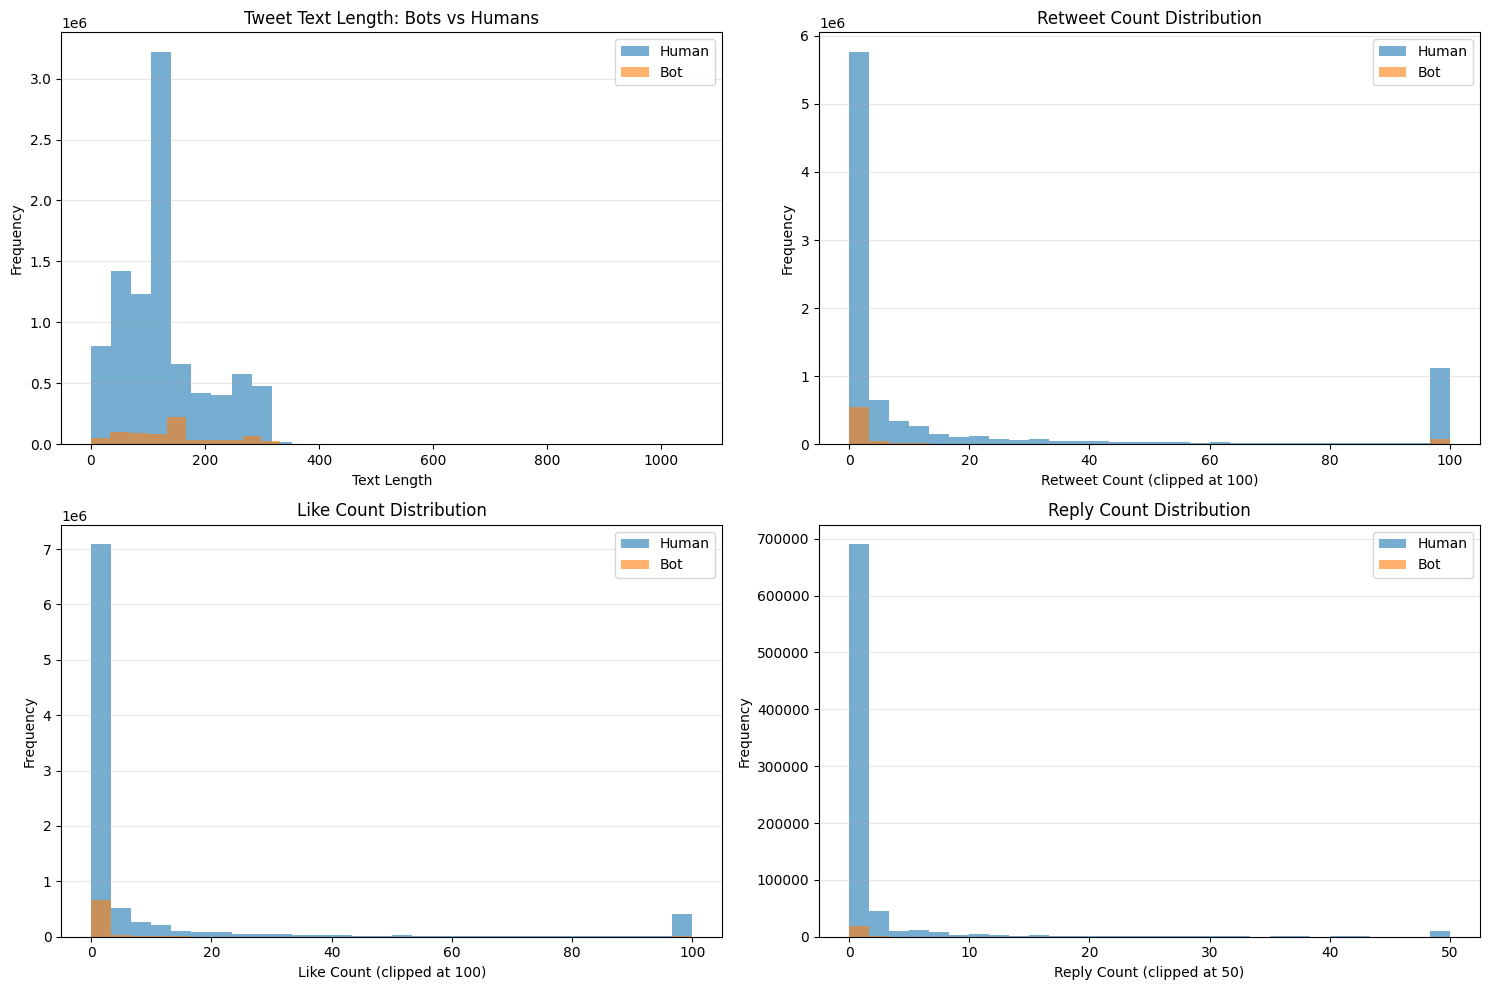

In [42]:
# Visualize tweet patterns: Bot vs Human
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Text length distribution
axes[0, 0].hist(tweets_with_labels[tweets_with_labels['label'] == 0]['text_length'], 
                bins=30, alpha=0.6, label='Human', color='#1f77b4')
axes[0, 0].hist(tweets_with_labels[tweets_with_labels['label'] == 1]['text_length'], 
                bins=30, alpha=0.6, label='Bot', color='#ff7f0e')
axes[0, 0].set_xlabel('Text Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Tweet Text Length: Bots vs Humans')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Retweet count distribution
axes[0, 1].hist(tweets_with_labels[tweets_with_labels['label'] == 0]['retweet_count'].clip(0, 100), 
                bins=30, alpha=0.6, label='Human', color='#1f77b4')
axes[0, 1].hist(tweets_with_labels[tweets_with_labels['label'] == 1]['retweet_count'].clip(0, 100), 
                bins=30, alpha=0.6, label='Bot', color='#ff7f0e')
axes[0, 1].set_xlabel('Retweet Count (clipped at 100)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Retweet Count Distribution')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Like count distribution
axes[1, 0].hist(tweets_with_labels[tweets_with_labels['label'] == 0]['like_count'].clip(0, 100), 
                bins=30, alpha=0.6, label='Human', color='#1f77b4')
axes[1, 0].hist(tweets_with_labels[tweets_with_labels['label'] == 1]['like_count'].clip(0, 100), 
                bins=30, alpha=0.6, label='Bot', color='#ff7f0e')
axes[1, 0].set_xlabel('Like Count (clipped at 100)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Like Count Distribution')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Reply count distribution
axes[1, 1].hist(tweets_with_labels[tweets_with_labels['label'] == 0]['reply_count'].clip(0, 50), 
                bins=30, alpha=0.6, label='Human', color='#1f77b4')
axes[1, 1].hist(tweets_with_labels[tweets_with_labels['label'] == 1]['reply_count'].clip(0, 50), 
                bins=30, alpha=0.6, label='Bot', color='#ff7f0e')
axes[1, 1].set_xlabel('Reply Count (clipped at 50)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Reply Count Distribution')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
## Save Processed Data

In [ ]:
# Save the merged tweets with user labels for future use
# Drop columns with mixed types that cause parquet issues
columns_to_drop = ['entities', 'context_annotations', 'public_metrics', 'referenced_tweets', 
                   'attachments', 'geo', 'withheld_x', 'withheld_y']
tweets_for_save = tweets_with_labels.drop(columns=[col for col in columns_to_drop if col in tweets_with_labels.columns])

output_path = os.path.join(DATASET_DIR, "tweets_with_labels.parquet")
tweets_for_save.to_parquet(output_path, index=False)
print(f"Saved {len(tweets_for_save)} tweets with labels to: {output_path}")

# Also save a CSV version for easier inspection
csv_path = os.path.join(DATASET_DIR, "tweets_with_labels.csv")
tweets_for_save.to_csv(csv_path, index=False)
print(f"Also saved as CSV: {csv_path}")

print(f"\nDataset info:")
print(f"Shape: {tweets_for_save.shape}")
print(f"Columns saved: {tweets_for_save.columns.tolist()}")
print(f"Memory: {tweets_for_save.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Saved 10000000 tweets with labels to: G:\CODING\DATASETS\TWIBOT22\tweets_with_labels.parquet


: 